In [69]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [70]:
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

In [71]:
from pandas.io.data import DataReader

In [72]:
from datetime import datetime

In [73]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','TSLA','GM','TM']

In [74]:
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

In [75]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

## Apple

In [56]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1997-01-17,16.750000,17.125000,16.625000,16.750000,81286800,0.544883
1997-01-20,16.875001,17.125000,16.750000,16.937500,72906400,0.550982
1997-01-21,17.000000,17.249999,16.875001,17.249999,71206800,0.561148
1997-01-22,17.375000,17.500000,17.000000,17.187500,51405200,0.559115
1997-01-23,17.249999,17.375000,17.125000,17.249999,43086400,0.561148


In [57]:
AAPL.reset_index(level=0, inplace=True)

In [58]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
AAPL = AAPL.sort_values(by='Date')  
AAPL = AAPL.set_index('Date')

In [59]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1997-01-17,16.750000,17.125000,16.625000,16.750000,81286800,0.544883
1997-01-20,16.875001,17.125000,16.750000,16.937500,72906400,0.550982
1997-01-21,17.000000,17.249999,16.875001,17.249999,71206800,0.561148
1997-01-22,17.375000,17.500000,17.000000,17.187500,51405200,0.559115
1997-01-23,17.249999,17.375000,17.125000,17.249999,43086400,0.561148


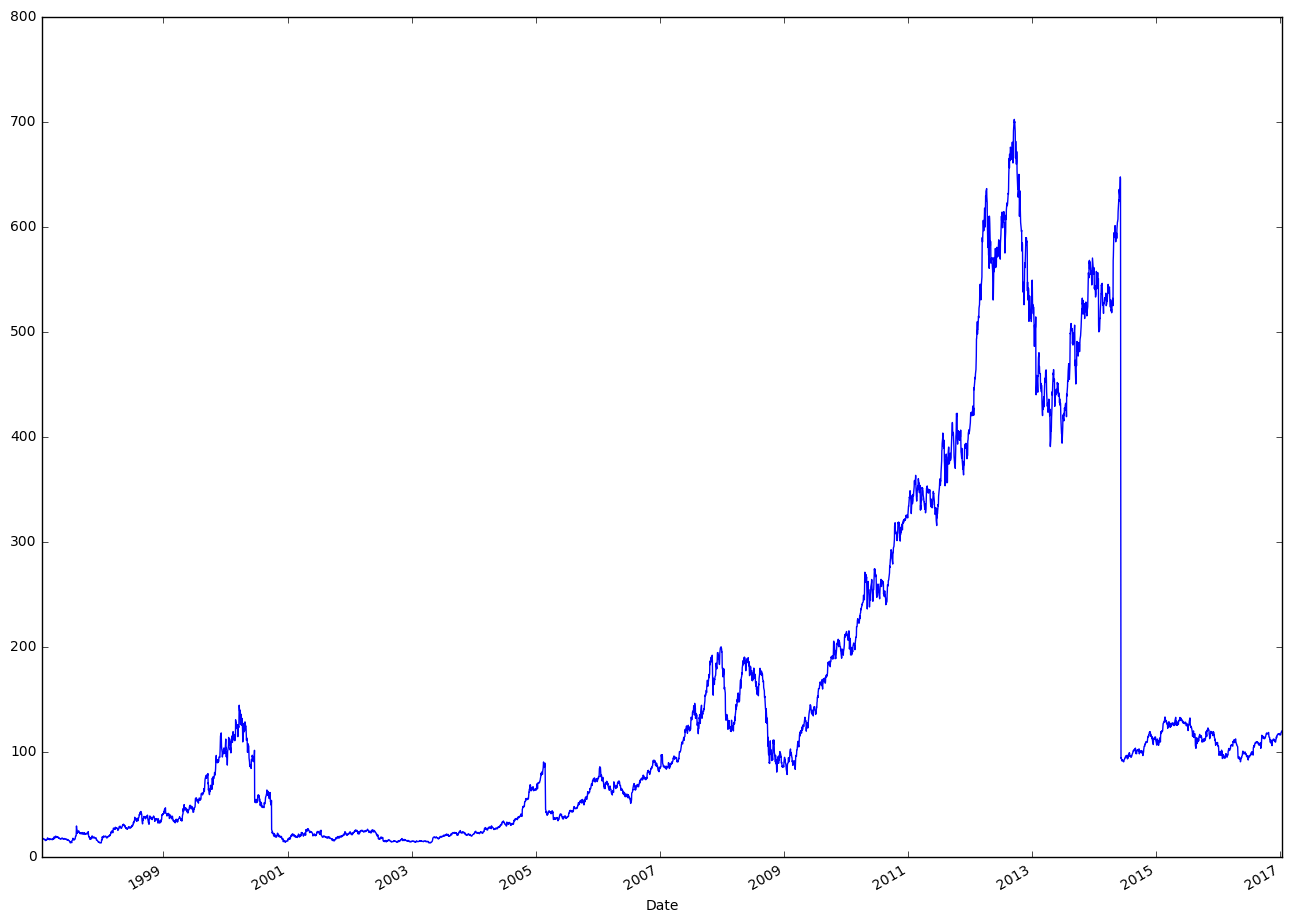

In [60]:
AAPL['Close'].plot(figsize=(16,12))

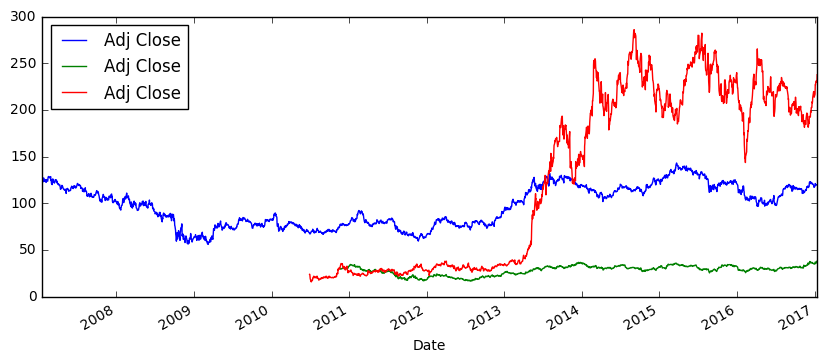

In [76]:
TM['Adj Close'].plot(legend=True,figsize=(10,4))
GM['Adj Close'].plot(legend=True,figsize=(10,4))
TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

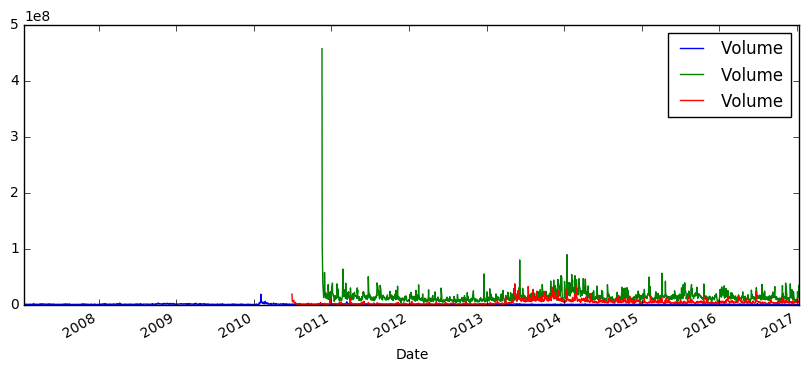

In [77]:
TM['Volume'].plot(legend=True,figsize=(10,4))
GM['Volume'].plot(legend=True,figsize=(10,4))
TSLA['Volume'].plot(legend=True,figsize=(10,4))

In [16]:
#moving average

In [78]:
ma_day = [10,20,50]

In [86]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()
    GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma).mean()
    MSFT[column_name] = MSFT['Adj Close'].rolling(window=ma).mean()
    AMZN[column_name] = AMZN['Adj Close'].rolling(window=ma,center=True).mean()

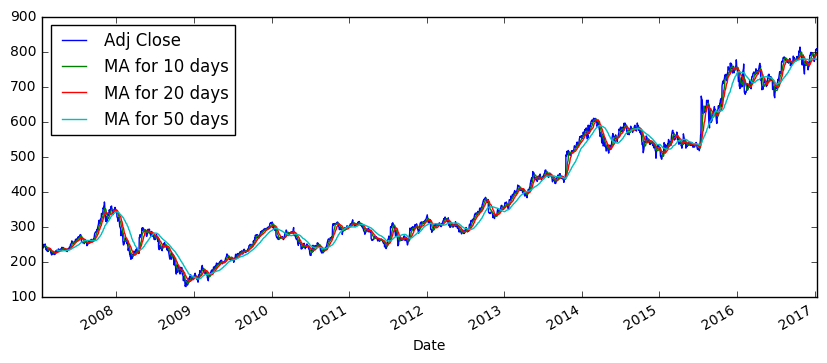

In [82]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize=(10,4))

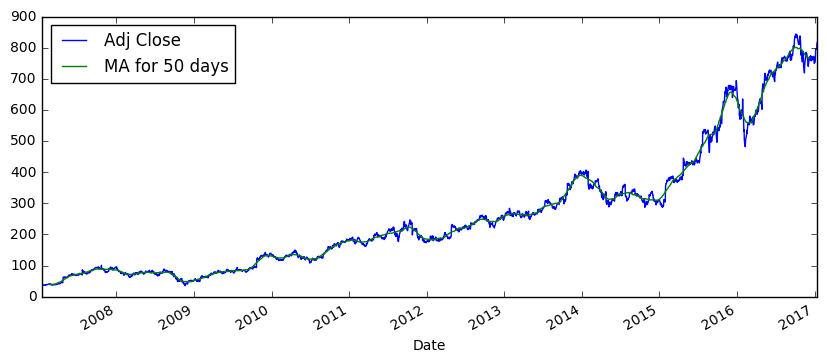

In [87]:
AMZN[['Adj Close','MA for 50 days']].plot(subplots = False,figsize=(10,4))

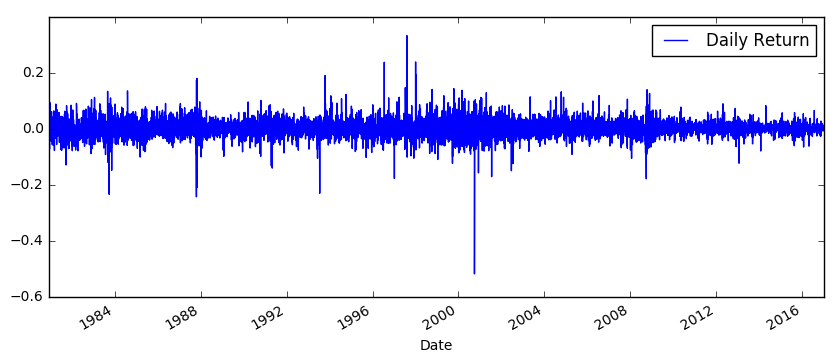

In [49]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True)

In [90]:
#AAPL['First Difference'] = AAPL['Close'] - AAPL['Close'].shift()
#AAPL['First Difference'].plot(figsize=(10,4),legend=True)

In [92]:
import seaborn as sns

In [89]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

NameError: name 'sns' is not defined

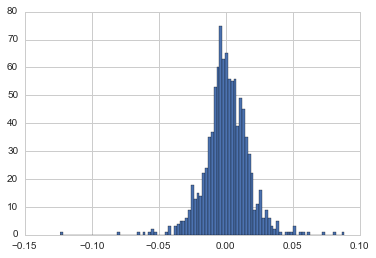

In [154]:
AAPL['Daily Return'].hist(bins=100)

In [47]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [76]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-08-24,32.051224,124.529999,NaN,20.957954
2010-08-25,32.446640,126.849998,NaN,21.010261
2010-08-26,32.097978,124.860001,NaN,20.766158
2010-08-27,32.276984,126.639999,NaN,20.862056
2010-08-30,32.394546,123.790001,NaN,20.609235


In [48]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-08-26,NaN,NaN,NaN,NaN
2013-08-27,-0.028590,-0.018448,NaN,-0.026062
2013-08-28,0.004728,0.002314,NaN,-0.007216
2013-08-29,0.001630,0.008523,NaN,0.016051
2013-08-30,-0.009111,-0.010564,NaN,-0.004471


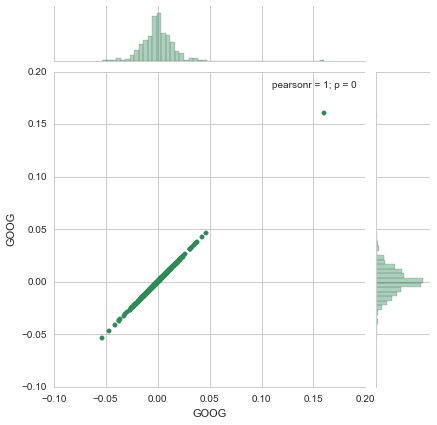

In [117]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

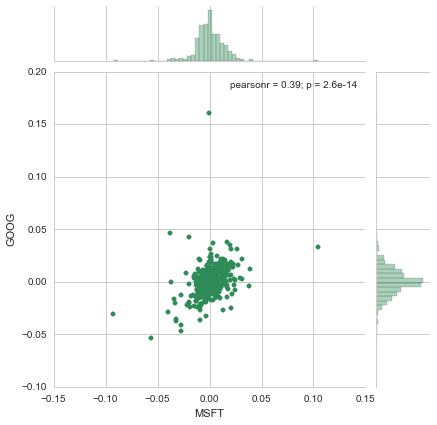

In [118]:
sns.jointplot('MSFT','GOOG',tech_rets,kind='scatter',color='seagreen')

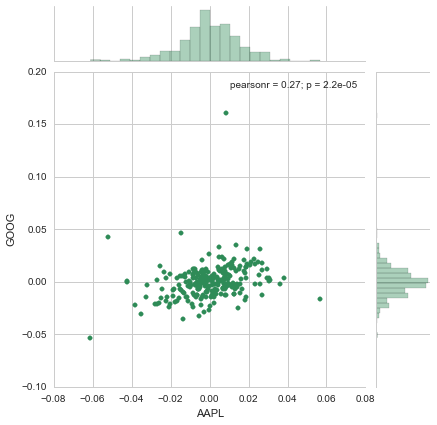

In [79]:
sns.jointplot('AAPL','GOOG',tech_rets,kind='scatter',color='seagreen')

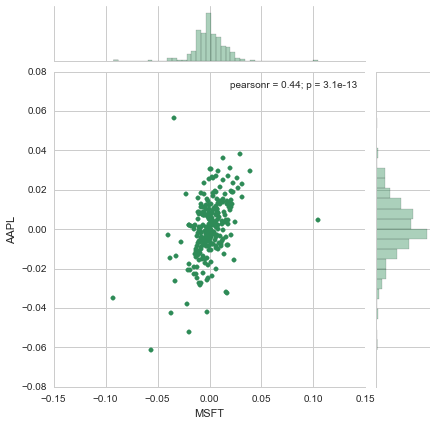

In [80]:
sns.jointplot('MSFT','AAPL',tech_rets,kind='scatter',color='seagreen')

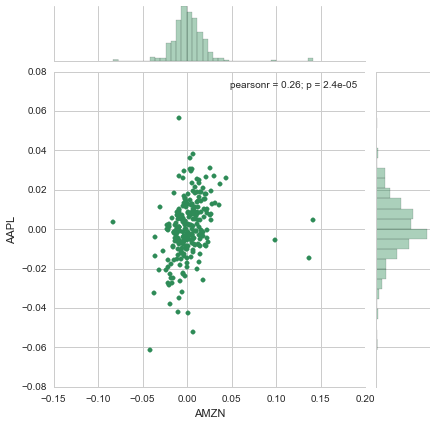

In [36]:
sns.jointplot('AMZN','AAPL',tech_rets,kind='scatter',color='seagreen')

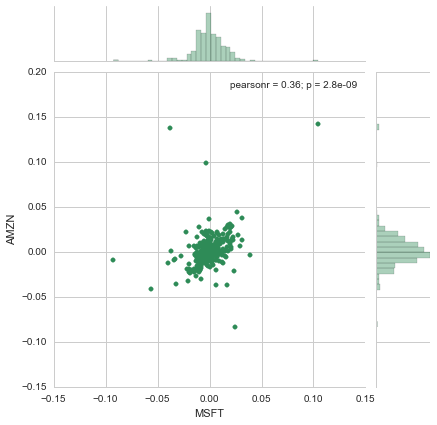

In [37]:
sns.jointplot('MSFT','AMZN',tech_rets,kind='scatter',color='seagreen')

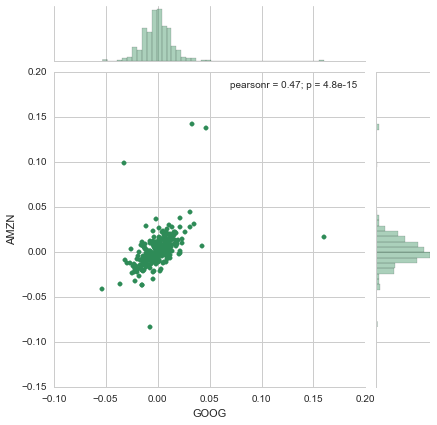

In [38]:
sns.jointplot('GOOG','AMZN',tech_rets,kind='scatter',color='seagreen')

In [50]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-08-26,NaN,NaN,NaN,NaN
2013-08-27,-0.028590,-0.018448,NaN,-0.026062
2013-08-28,0.004728,0.002314,NaN,-0.007216
2013-08-29,0.001630,0.008523,NaN,0.016051
2013-08-30,-0.009111,-0.010564,NaN,-0.004471


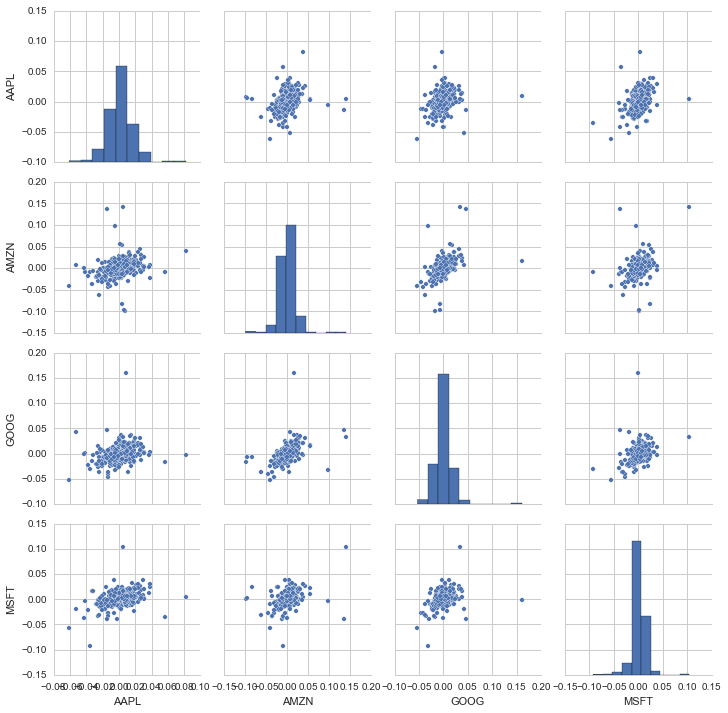

In [51]:
sns.pairplot(tech_rets.dropna())

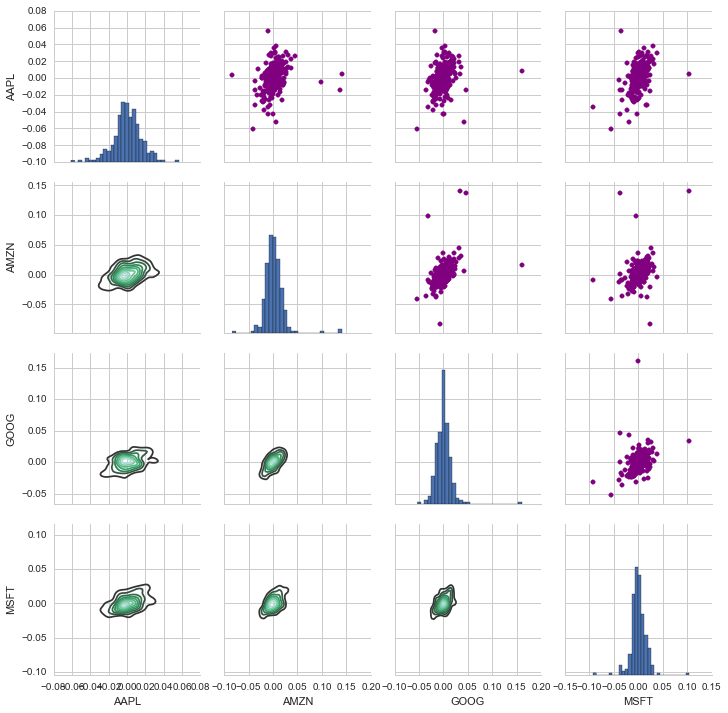

In [41]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,color='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

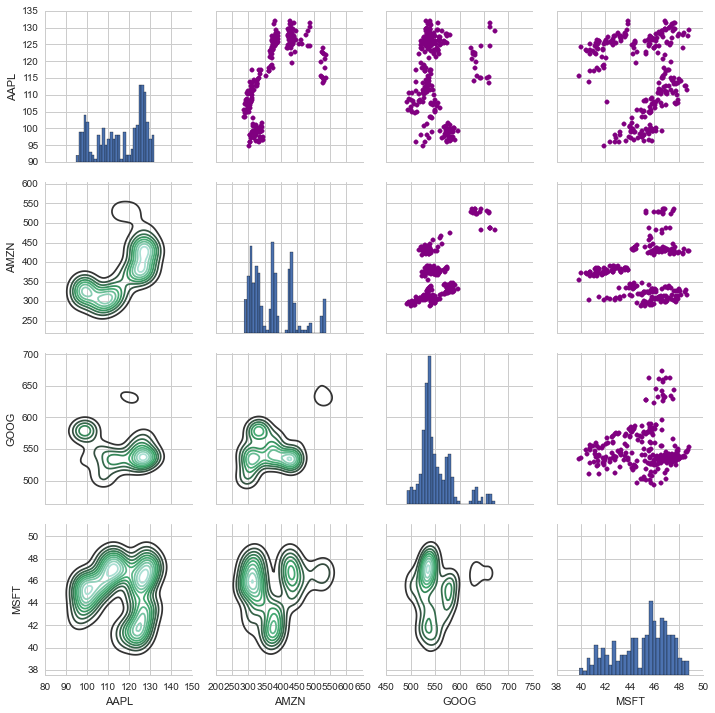

In [29]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,color='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

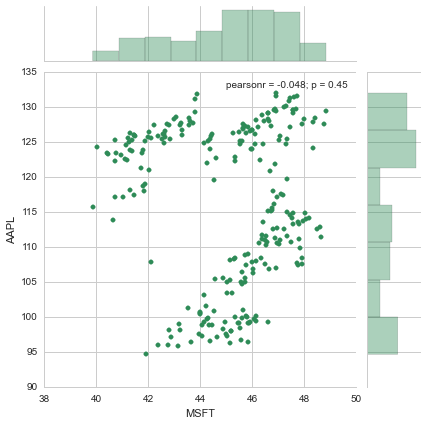

In [33]:
sns.jointplot('MSFT','AAPL',closing_df,kind='scatter',color='seagreen')

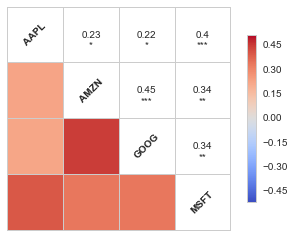

In [37]:
sns.corrplot(tech_rets.dropna(),annot=True)

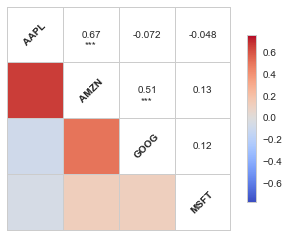

In [38]:
sns.corrplot(closing_df.dropna(),annot=True)

In [52]:
rets = tech_rets.dropna()

In [53]:
area = np.pi*20

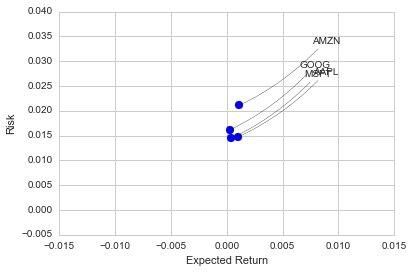

In [68]:
plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext=(100,60),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-.1'))

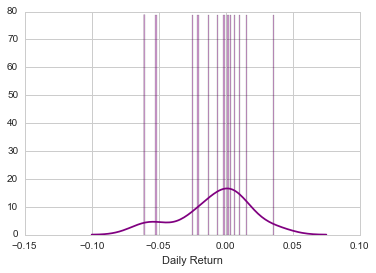

In [119]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [120]:
rets['AAPL'].quantile(0.05)

-0.022899451017092565

In [121]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']



In [122]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [76]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2014-03-27,568.002570,568.002570,552.922516,558.462551,13100,558.462551,NaN,NaN,NaN
2014-03-28,561.202549,566.432590,558.672477,559.992504,41200,559.992504,NaN,NaN,NaN
2014-03-31,566.892592,567.002574,556.932537,556.972503,10800,556.972503,NaN,NaN,NaN
2014-04-01,558.712565,568.452595,558.712565,567.162558,7900,567.162558,NaN,NaN,NaN
2014-04-02,599.992707,604.832763,562.192568,567.002574,147100,567.002574,NaN,NaN,NaN


In [127]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    plt.xlabel("Days")
    plt.ylabel("Price")  
    plt.title('Monte Carlo Analysis for Google')

ValueError: scale <= 0

In [ ]:
M